In [4]:
import numpy as np
import pandas as pd
import sklearn

In [5]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1731,ham,Lol. Well quality aint bad at all so i aint co...,NaN,NaN,NaN
4633,ham,These won't do. Have to move on to morphine,NaN,NaN,NaN
1460,ham,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...,NaN,NaN,NaN
1242,ham,Nobody can decide where to eat and dad wants C...,NaN,NaN,NaN
212,ham,K:)k:)good:)study well.,NaN,NaN,NaN


In [7]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evaluation
# Improvement

## 1. Data Cleaning

In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
4808,ham,"Don't worry though, I understand how important..."
4924,ham,Ok... Let u noe when i leave my house.
1308,ham,I jokin oni lar.. ÌÏ busy then i wun disturb Ì_.
5195,ham,Darren was saying dat if u meeting da ge den w...
3230,ham,No plm i will come da. On the way.


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True) #to rename the columns
df.sample(5)  # returns unordered data

,target,text
893,ham,It's ok i noe u're busy but i'm really too bor...
2487,ham,K ill drink.pa then what doing. I need srs mod...
3239,ham,A cute thought for friendship: \Its not necess...
4285,ham,Congrats. That's great. I wanted to tell you n...
1131,ham,"Sorry, I'll call later"


In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\python3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [13]:
import sklearn

In [14]:
from sklearn.preprocessing import LabelEncoder # used to convert ham and spam to 0 and 1
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target']) # transforms selected columns to 0 and 1

In [16]:
df.head() # returns ordered data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# duplicate values
df.duplicated().sum()

403

In [19]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape # used to see the total data

(5169, 2)

## EDA
(exploratory data analysis; used to get some info on the nature of data)

In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


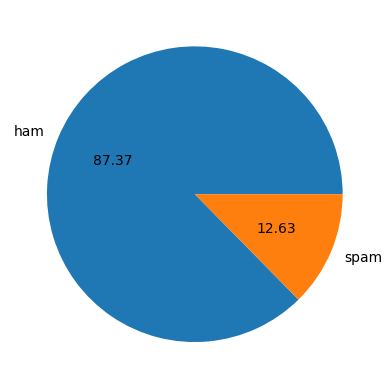

In [24]:
import matplotlib.pyplot as plt # used to plot graphs
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# the data is unbalanced as pct of ham is high compared to the spam

In [26]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters'] = df['text'].apply(len) # made a new column num_char and assigned it the
 # length of characters by using apply method of pandas. Len is used to count the length of the input value

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# word_tokenize is used to divide the text on the basis of the word

In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df[['num_characters','num_words','num_sentences']].describe() # shows the data for a single message

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham - properties for a single ham message
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# spam - properties for a single spam message
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
# we can observe by seeing the difference between ham and spam messages, that spam messages have
# more characters, words and sentences per message than ham.

In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [38]:
# We can show this difference by plotting a histogram using this library
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

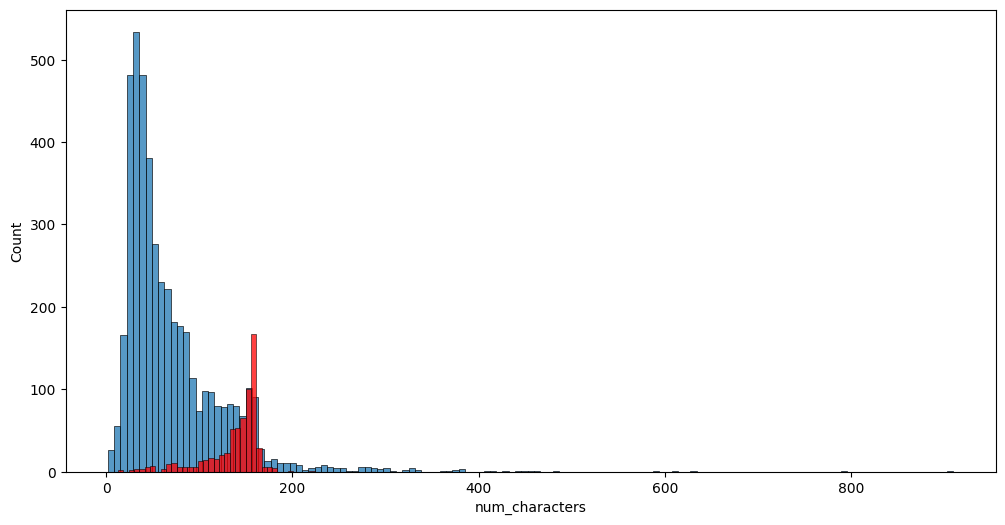

In [39]:
plt.figure(figsize=(12,6)) # used to set the size of the graph
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

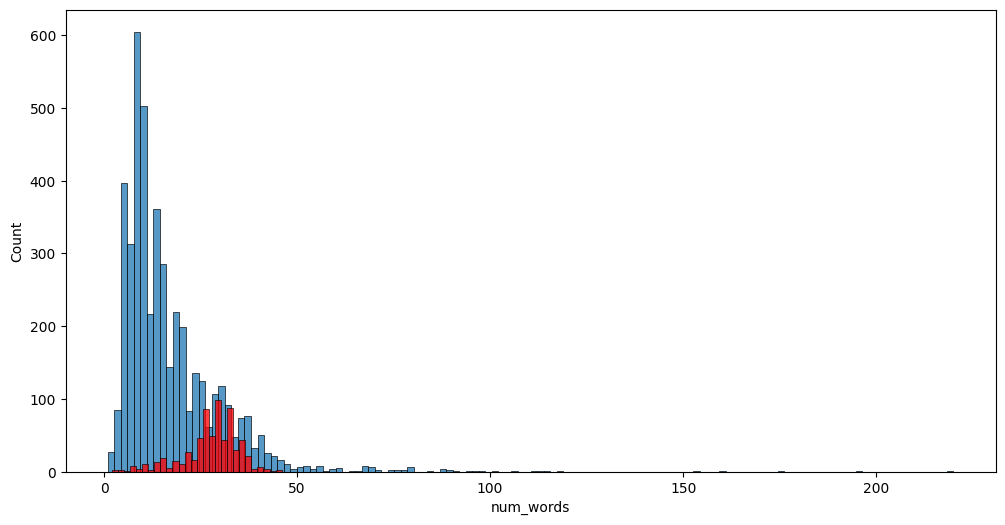

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

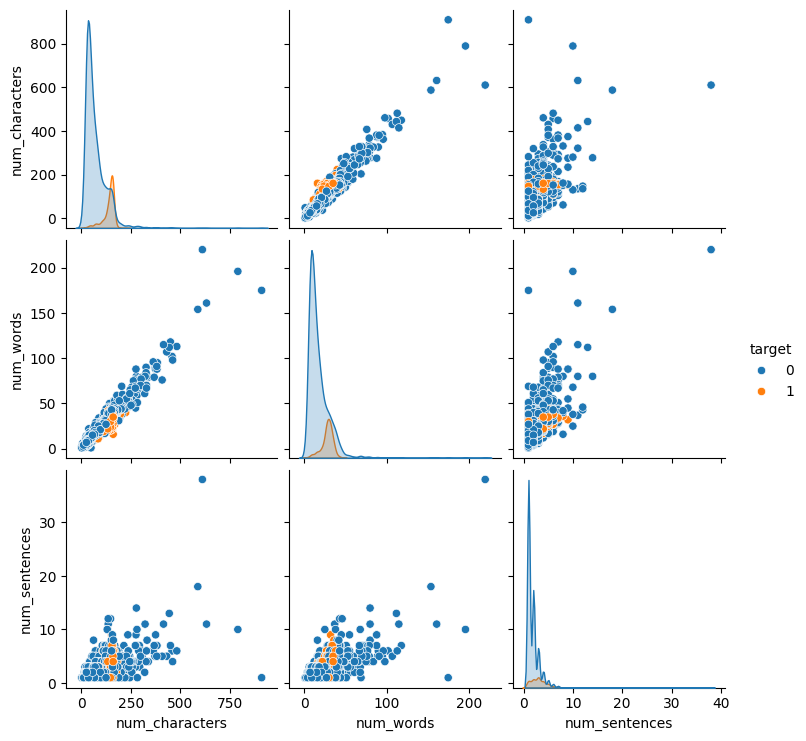

In [41]:
sns.pairplot(df,hue='target') # shows relation between the columns

<Axes: >

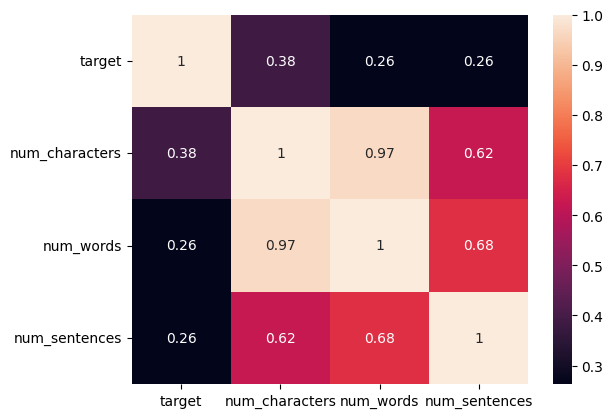

In [42]:
sns.heatmap(df.corr(numeric_only = True),annot=True) # shows a heatmap of correlation of the columns. Annot is used to
# display numbers on the cells

## Data Preprocessing
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation(stop word means words like is, of, the which dont contribute in meaning of the sentence)

Stemming(means converting words of same type to a single word)

In [43]:
def transform_text(text): # it is a function definition with text as an argument
    text = text.lower() #to convert in lowercase
    text = nltk.word_tokenize(text) # to divide in words

    y = []
    for i in text:        # to remove special char
        if i.isalnum():  # if i is alphanumeric
            y.append(i)  #

            text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # used to remove the stopwords and punctuation
            y.append(i)

            text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    # return y # to show the output
    return " ".join(y)   # join method is used for strings which puts spaces or other characters between them

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()     # making an object of PorterStemmer
ps.stem('loving')

'love'

In [48]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
df['transformed_text'] = df['text'].apply(transform_text) # applied the transform_text function on text column

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [53]:
# We will create a wordcloud which will display the important(or most used) words in a message with increased height and width
# To create a wordcloud for spam message
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white') # making an object of wordcloud and setting height and width

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

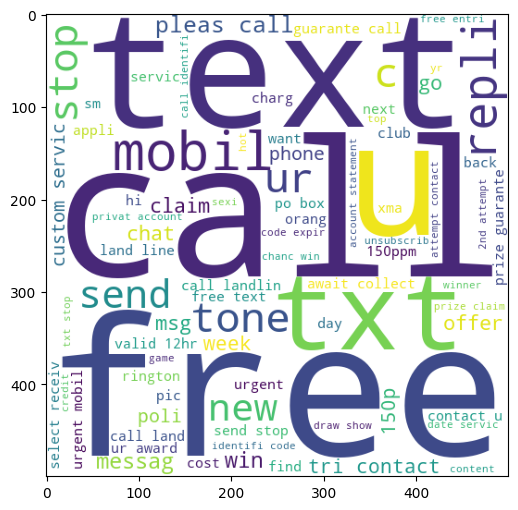

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

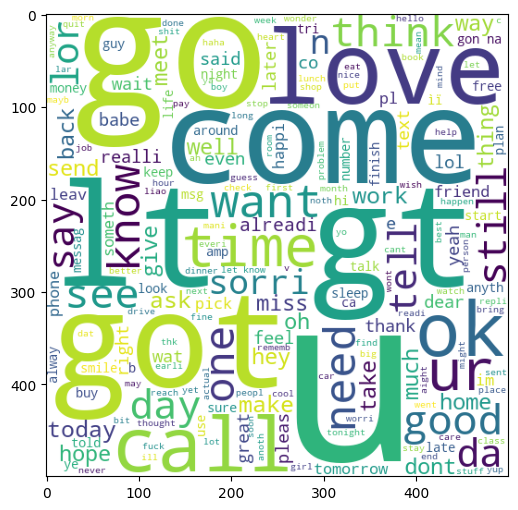

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
df[df['target']==1] # extracting rows with target=1

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [59]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():    #tolist() is used to convert into a list
     for word in msg.split():    # to separate the words
        spam_corpus.append(word)

In [60]:
len(spam_corpus)

9939

In [61]:
from collections import Counter
Counter(spam_corpus).most_common(30) # counts the number of top 30 most repeated words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

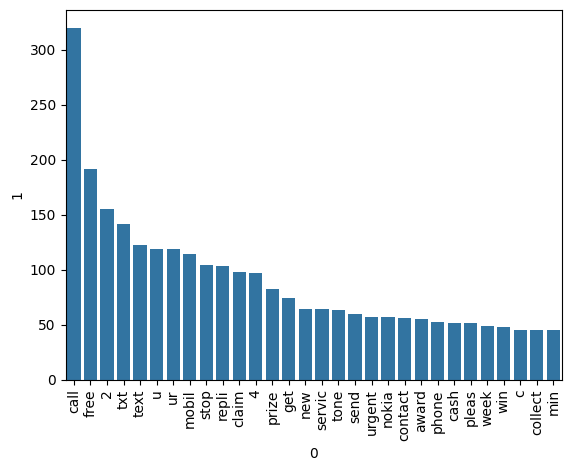

In [62]:
from collections import Counter
# we have put the top 30 words in a dataframe and made a barplot
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') # xticks sets the x-axis tick values, which are the locations along the x-axis where the tick marks appear
plt.show()

In [63]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():    #tolist() is used to convert into a list
     for word in msg.split():    # to separate the words
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

35429

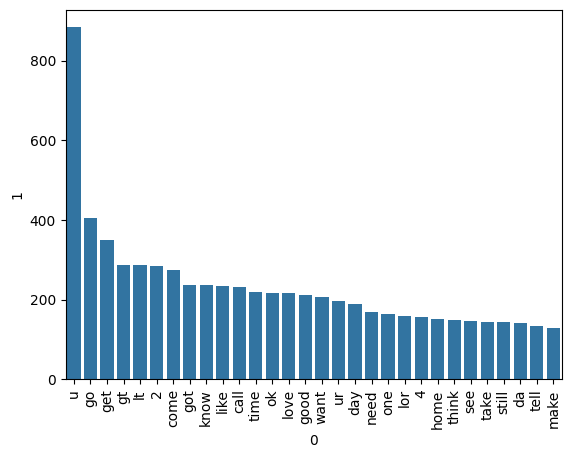

In [65]:
from collections import Counter
# we have put the top 30 words in a dataframe and made a barplot
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building

In [67]:
 # We will create a ml model using naive bayes algo as it works best for textual data. For any ml model, numerical input is required, So, we
 # will convert the text messages into vectors(numbers) using bag of words method and tf-idf method 

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # max features will only select the top 3000 words(to be vectorized) form the corpus

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [70]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [71]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [72]:
X.shape # output will be(no. of messages, total no. of words)

(5169, 3000)

In [73]:
y = df['target'].values

In [74]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) # splitting the data into train set and test set

# “random_state” is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it.
# In other words, it ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score #(as the spam classifier is a high precision model)

In [78]:
# creating object of each imported algo(as we dont know the distribution of data so we imported three distributions)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
# Training the gnb model
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[789 107]
 [ 25 113]]
0.5136363636363637


In [80]:
# Training the mnb model
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [81]:
# Training the bnb model
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [82]:
# We are getting 1.0 precision in mnb model using tfidf so we will use that model
 # (as precision is more important than accuracy, in case of imbalanced data)
 # (precision 1 means that model is specifying every spam message as spam without a single mistake)

In [83]:
pip install xgboost

In [84]:
# importing other classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [85]:
# making an object for each model
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
# making a dictionary for all the models
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [87]:
# Making a function to train and test the models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [89]:
accuracy_scores = []
precision_scores = []

# implementing a for loop on clfs dictionary
for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8217821782178217
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9724770642201835
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8615384615384616
For  ETC
Accuracy -  0.97678916827853
Precision -  0.975
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316


In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.972921,0.982456
8,ETC,0.976789,0.975000
0,SVC,0.975822,0.974790
6,AdaBoost,0.966151,0.972477
4,LR,0.958414,0.970297
10,xgb,0.964217,0.931624
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.861538


In [92]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [93]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.972921
3,ETC,Accuracy,0.976789
4,SVC,Accuracy,0.975822
5,AdaBoost,Accuracy,0.966151
6,LR,Accuracy,0.958414
7,xgb,Accuracy,0.964217
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


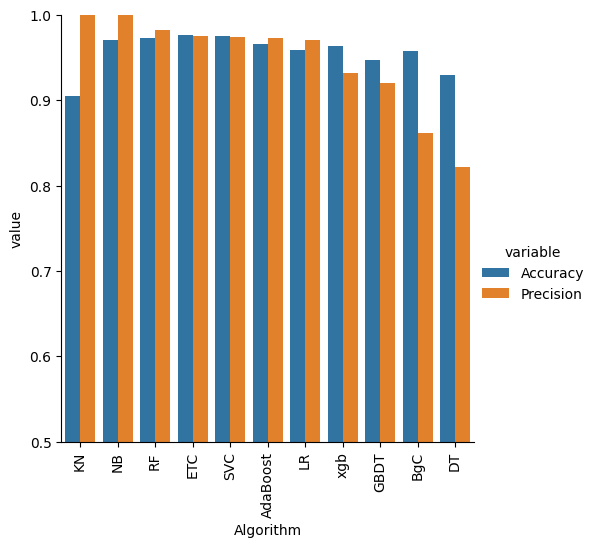

In [94]:
  # plotting a bar graph of this dataframe
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [98]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [99]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [101]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
3,ETC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,AdaBoost,0.966151,0.972477,0.966151,0.972477,0.966151,0.972477,0.966151,0.972477
6,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
7,xgb,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.861538,0.957447,0.861538,0.957447,0.861538,0.957447,0.861538


In [102]:
# Voting Classifier is used to check if the combination of algos can be better than the best performing algorithm
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [103]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [104]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [106]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9916666666666667


In [107]:
# Applying stacking(it is similar to voting but more weigthage is given to a particular algorithm)
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [108]:
from sklearn.ensemble import StackingClassifier

In [109]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [110]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [111]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))